In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sp500 = yf.download('^GSPC', start='2018-01-01', end='2022-12-31', progress=False)

YF.download() has changed argument auto_adjust default to True


In [3]:
prices = sp500['Close']

In [4]:
scaled_prices = []

for i in range(len(prices)):
    x = prices.squeeze().iloc[i]
    y = (x - prices.squeeze().min()) / (prices.squeeze().max() - prices.squeeze().min())
    scaled_prices.append(y)

In [5]:
log_returns = []

for i in range(1,len(prices)):
    x = np.log(prices.squeeze().iloc[i]) - np.log(prices.squeeze().iloc[i-1])
    log_returns.append(x)

log_returns.insert(0,0)

In [6]:
smooth_prices = []
smooth_prices.append(prices.squeeze().iloc[1])
alpha = 2/5

for i in range(2, len(prices)):
    x = prices.squeeze().iloc[i]
    y = smooth_prices[-1]
    z = prices.squeeze().iloc[i-2]

    p = alpha * (x + (0.5 * (x-z))) + (1-alpha) * y
    smooth_prices.append(p)

In [7]:
X = pd.DataFrame({
    'SPrices': smooth_prices
    # 'Close Prices': prices.squeeze(),
    # 'Log Returns': log_returns,
    # 'Scaled Prices': scaled_prices
})

X['PCT'] = X['SPrices'].pct_change() * 100
X['PCT-1'] = X['PCT'].shift(1)
X['PCT-2'] = X['PCT'].shift(2)
X['PCT-3'] = X['PCT'].shift(3)
X['PCT-4'] = X['PCT'].shift(4)
X['PCT-5'] = X['PCT'].shift(5)
X['PCT-6'] = X['PCT'].shift(6)
X['PCT-7'] = X['PCT'].shift(7)

X = X.dropna()
X

,SPrices,PCT,PCT-1,PCT-2,PCT-3,PCT-4,PCT-5,PCT-6,PCT-7
8,2779.142909,0.040963,0.658009,0.384347,-0.019108,0.134895,0.328100,0.515989,0.368881
9,2791.773782,0.454488,0.040963,0.658009,0.384347,-0.019108,0.134895,0.328100,0.515989
10,2798.598303,0.244451,0.454488,0.040963,0.658009,0.384347,-0.019108,0.134895,0.328100
11,2804.826999,0.222565,0.244451,0.454488,0.040963,0.658009,0.384347,-0.019108,0.134895
12,2823.072176,0.650492,0.222565,0.244451,0.454488,0.040963,0.658009,0.384347,-0.019108
...,...,...,...,...,...,...,...,...,...
1253,3837.492359,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,-1.569919,-1.690955,-0.088576
1254,3835.567437,-0.050161,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,-1.569919,-1.690955
1255,3802.308431,-0.867121,-0.050161,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,-1.569919
1256,3825.103076,0.599495,-0.867121,-0.050161,-0.164459,-0.363572,0.888984,-0.305845,-0.980367


In [8]:
Data = pd.DataFrame()

Data['PCT today'] = X['PCT']
Data['PCT today-1'] = X['PCT-1']
Data['PCT today-2'] = X['PCT-2']
Data['PCT today-3'] = X['PCT-3']
Data['PCT today-4'] = X['PCT-4']
Data['PCT today-5'] = X['PCT-5']
Data['PCT today-6'] = X['PCT-6']
Data['PCT today-7'] = X['PCT-7']

Data = Data.dropna()

Data

,PCT today,PCT today-1,PCT today-2,PCT today-3,PCT today-4,PCT today-5,PCT today-6,PCT today-7
8,0.040963,0.658009,0.384347,-0.019108,0.134895,0.328100,0.515989,0.368881
9,0.454488,0.040963,0.658009,0.384347,-0.019108,0.134895,0.328100,0.515989
10,0.244451,0.454488,0.040963,0.658009,0.384347,-0.019108,0.134895,0.328100
11,0.222565,0.244451,0.454488,0.040963,0.658009,0.384347,-0.019108,0.134895
12,0.650492,0.222565,0.244451,0.454488,0.040963,0.658009,0.384347,-0.019108
...,...,...,...,...,...,...,...,...
1253,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,-1.569919,-1.690955,-0.088576
1254,-0.050161,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,-1.569919,-1.690955
1255,-0.867121,-0.050161,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,-1.569919
1256,0.599495,-0.867121,-0.050161,-0.164459,-0.363572,0.888984,-0.305845,-0.980367


In [9]:
InputData = Data.drop('PCT today',axis='columns')
InputData

,PCT today-1,PCT today-2,PCT today-3,PCT today-4,PCT today-5,PCT today-6,PCT today-7
8,0.658009,0.384347,-0.019108,0.134895,0.328100,0.515989,0.368881
9,0.040963,0.658009,0.384347,-0.019108,0.134895,0.328100,0.515989
10,0.454488,0.040963,0.658009,0.384347,-0.019108,0.134895,0.328100
11,0.244451,0.454488,0.040963,0.658009,0.384347,-0.019108,0.134895
12,0.222565,0.244451,0.454488,0.040963,0.658009,0.384347,-0.019108
...,...,...,...,...,...,...,...
1253,-0.363572,0.888984,-0.305845,-0.980367,-1.569919,-1.690955,-0.088576
1254,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,-1.569919,-1.690955
1255,-0.050161,-0.164459,-0.363572,0.888984,-0.305845,-0.980367,-1.569919
1256,-0.867121,-0.050161,-0.164459,-0.363572,0.888984,-0.305845,-0.980367


In [10]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - x ** 2

In [19]:
# MLP

np.random.seed(24)

# Initialize neural network parameters
ninputs = 7
nhidden = 5
noutput = 1

weights1 = np.random.uniform(-1, 1, (ninputs, nhidden))  # Weights from input to hidden
weights2 = np.random.uniform(-1, 1, (nhidden, noutput))  # Weights from hidden to output

hiddenbias = np.random.uniform(-1, 1, (noutput, nhidden))  # Bias for hidden layer
outbias = np.random.uniform(-1, 1, (noutput, noutput))    # Bias for output layer

# learning_rate = 0.00025
learning_rate = 0.001
epochs = 101

k = 0.0002
T = 253

arr = np.arange(1,101)
SRarr = []

for epoch in range(1,epochs):
    
    allocations = np.zeros(len(InputData))
    net_input = np.zeros(len(InputData))
    
    for i in range(1,len(InputData) + 1):
        current_input = InputData.iloc[i-1]
        current_input = current_input.to_numpy().reshape(1, -1)
    
        # Forward Pass
        hidden_input = np.dot(current_input, weights1) + hiddenbias
        hidden_output = tanh(hidden_input)
    
        output_input = np.dot(hidden_output, weights2) + outbias
        output = tanh(output_input)
        net_input[i-1] = output_input.item()
        allocations[i-1] = output.item()
    
    # Calculation for Asset Returns and Mu
    asset_returns = allocations * Data['PCT today'].values
    average_daily_return = np.mean(asset_returns)
    average_daily_excess_return = average_daily_return - k
    
    # Calculation of Standard deviation
    squared_deviations = np.square(asset_returns - average_daily_excess_return)
    sigma = np.sqrt(np.mean(squared_deviations))
    
    # Annulaized Sharpe Ratio
    annualized_SR = np.sqrt(T) * (average_daily_excess_return / sigma)
    SRarr.append(annualized_SR)

    # Select random pattern
    num = np.random.randint(0, len(InputData))
    
    # Update weights per pattern    
    # Backpropagation
    a = np.sqrt(T) / sigma
    b = average_daily_excess_return / sigma
    c = (asset_returns[num] - (average_daily_excess_return + k)) / sigma
            
    Ct = a * (1 - (b * c))
    
    beta_output = Ct * Data['PCT today'].iloc[num] * (1 - np.square(allocations[num])) * net_input[num]   # Also the delta
    beta_hidden = tanh_derivative(hidden_output) * (weights2 * beta_output).T  # [1x5]
    
    weights2 += learning_rate * beta_output
    weights1 += learning_rate * np.dot(current_input.T, beta_hidden)
    outbias += learning_rate * beta_output
    hiddenbias += learning_rate * beta_hidden
        
    if epoch % 50 == 0:
        print(f"Epoch {epoch}")
        print(f"Gradient: {beta_output}, Weight Update: {learning_rate * beta_output}, Ct: {Ct}")
        print(f"Weights1: {weights1}")
        print(f"Weights: {weights2}")
        print(f"Hiiden Bias: {hiddenbias}, Out Bias: {outbias}")
        print(f"Allocations: {allocations}, Net_Input: {net_input}")
        print(f"Asset Returns: {asset_returns}, Average Daily Excess Return: {average_daily_excess_return}")
        print(f"Sigma: {sigma}, Annualized SR: {annualized_SR}")

Epoch 50
Gradient: 10.958646479583534, Weight Update: 0.010958646479583533, Ct: 28.098476623968995
Weights1: [[ 0.92206439  0.44370386  1.01893626 -0.51358567 -0.28754313]
 [ 0.47674607  0.92828579 -0.39507972 -0.79385072 -0.2180736 ]
 [-0.35913127 -0.27090894  0.41769648  0.79641254  0.0690388 ]
 [-0.5059693   0.33135618  0.11819064  0.0724239   0.78954408]
 [ 0.68432811 -0.41507151  0.25069442  0.3324107   0.94671104]
 [ 0.79014424  0.95110681  0.31292491  0.29792293 -0.55895201]
 [-0.0289718   0.59164427  0.67864416  0.04575115  0.52052223]]
Weights: [[ 0.11744572]
 [ 0.81874775]
 [ 0.3574855 ]
 [ 0.84132031]
 [-0.41851365]]
Hiiden Bias: [[-0.19217735  0.32327913 -0.68189683 -0.67720516 -0.18244679]], Out Bias: [[0.23185792]]
Allocations: [ 0.51441862  0.38422787  0.50004366 ... -0.91831455 -0.81807566
  0.71887555], Net_Input: [ 0.56872     0.40501039  0.54936436 ... -1.57816318 -1.1509715
  0.90531407]
Asset Returns: [ 0.0210723   0.17462699  0.1222362  ...  0.79628972 -0.49043219

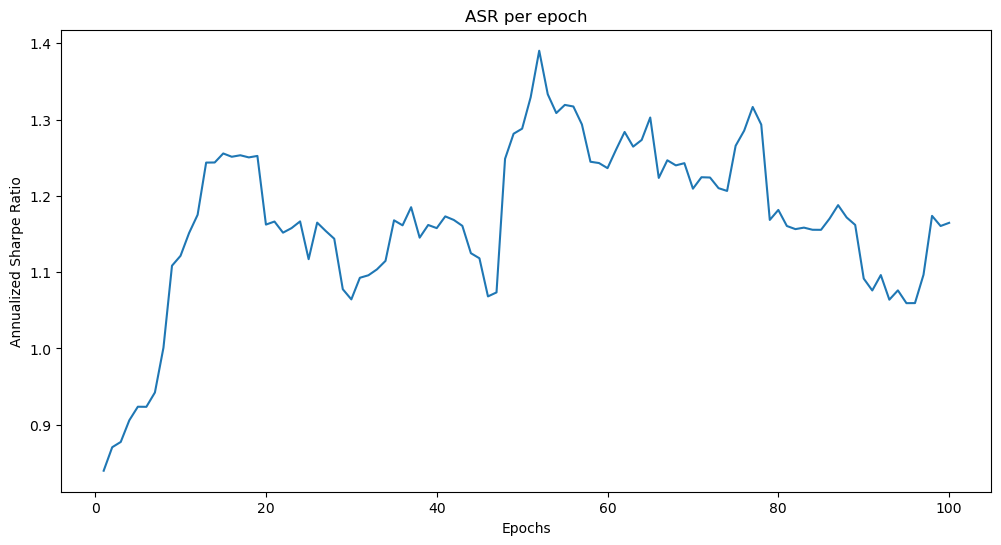

In [20]:
plt.figure(figsize=(12, 6))
plt.plot(arr, SRarr)
plt.xlabel("Epochs")
plt.ylabel("Annualized Sharpe Ratio")
plt.title("ASR per epoch")
plt.show()

In [12]:
test = yf.download('^GSPC', start='2023-01-01', end='2024-12-31', progress=False)
test_prices = test['Close']

In [13]:
test_scaled_prices = []

for i in range(len(test_prices)):
    x = test_prices.squeeze().iloc[i]
    y = (x - test_prices.squeeze().min()) / (test_prices.squeeze().max() - test_prices.squeeze().min())
    test_scaled_prices.append(y)

In [14]:
test_log_returns = []

for i in range(1,len(test_prices)):
    x = np.log(test_prices.squeeze().iloc[i]) - np.log(test_prices.squeeze().iloc[i-1])
    test_log_returns.append(x)

test_log_returns.insert(0,0)

In [15]:
test_smooth_prices = []
test_smooth_prices.append(test_prices.squeeze().iloc[1])
test_alpha = 2/5

for i in range(2, len(test_prices)):
    x = test_prices.squeeze().iloc[i]
    y = test_smooth_prices[-1]
    z = test_prices.squeeze().iloc[i-2]

    p = test_alpha * (x + (0.5 * (x-z))) + (1-test_alpha) * y
    test_smooth_prices.append(p)

In [16]:
test_X = pd.DataFrame({
    'SPrices': test_smooth_prices,
    'Close Prices': test_prices.squeeze()[1:],
    # 'Log Returns': test_log_returns,
    # 'Scaled Prices': test_scaled_prices
})

test_X['PCT'] = test_X['SPrices'].pct_change() * 100
test_X['PCT-1'] = test_X['PCT'].shift(1)
test_X['PCT-2'] = test_X['PCT'].shift(2)
test_X['PCT-3'] = test_X['PCT'].shift(3)
test_X['PCT-4'] = test_X['PCT'].shift(4)
test_X['PCT-5'] = test_X['PCT'].shift(5)
test_X['PCT-6'] = test_X['PCT'].shift(6)
test_X['PCT-7'] = test_X['PCT'].shift(7)

test_X = test_X.dropna()
test_X

,SPrices,Close Prices,PCT,PCT-1,PCT-2,PCT-3,PCT-4,PCT-5,PCT-6,PCT-7
Date,,,,,,,,,,
2023-01-17,3992.286035,3990.969971,0.043168,0.390212,0.676701,1.024079,0.394306,0.709268,0.880221,-0.549081
2023-01-18,3952.869668,3928.860107,-0.987313,0.043168,0.390212,0.676701,1.024079,0.394306,0.709268,0.880221
2023-01-19,3912.837865,3898.850098,-1.012728,-0.987313,0.043168,0.390212,0.676701,1.024079,0.394306,0.709268
2023-01-20,3945.496762,3972.610107,0.834660,-1.012728,-0.987313,0.043168,0.390212,0.676701,1.024079,0.394306
2023-01-23,3999.414073,4019.810059,1.366553,0.834660,-1.012728,-0.987313,0.043168,0.390212,0.676701,1.024079
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,5957.033674,5974.069824,0.795610,0.569291,-1.135511,-1.901801,-0.098039,0.223182,-0.189004,-0.041424
2024-12-24,6012.074208,6040.040039,0.923959,0.795610,0.569291,-1.135511,-1.901801,-0.098039,0.223182,-0.189004
2024-12-26,6034.984466,6037.589844,0.381071,0.923959,0.795610,0.569291,-1.135511,-1.901801,-0.098039,0.223182


In [17]:
test_Data = pd.DataFrame()

test_Data['Close Prices'] = test_X['Close Prices']
test_Data['SPrices'] = test_X['SPrices']
test_Data['PCT today'] = test_X['PCT']
test_Data['PCT today-1'] = test_X['PCT-1']
test_Data['PCT today-2'] = test_X['PCT-2']
test_Data['PCT today-3'] = test_X['PCT-3']
test_Data['PCT today-4'] = test_X['PCT-4']
test_Data['PCT today-5'] = test_X['PCT-5']
test_Data['PCT today-6'] = test_X['PCT-6']
test_Data['PCT today-7'] = test_X['PCT-7']

test_Data = test_Data.dropna()

test_Data

,Close Prices,SPrices,PCT today,PCT today-1,PCT today-2,PCT today-3,PCT today-4,PCT today-5,PCT today-6,PCT today-7
Date,,,,,,,,,,
2023-01-17,3990.969971,3992.286035,0.043168,0.390212,0.676701,1.024079,0.394306,0.709268,0.880221,-0.549081
2023-01-18,3928.860107,3952.869668,-0.987313,0.043168,0.390212,0.676701,1.024079,0.394306,0.709268,0.880221
2023-01-19,3898.850098,3912.837865,-1.012728,-0.987313,0.043168,0.390212,0.676701,1.024079,0.394306,0.709268
2023-01-20,3972.610107,3945.496762,0.834660,-1.012728,-0.987313,0.043168,0.390212,0.676701,1.024079,0.394306
2023-01-23,4019.810059,3999.414073,1.366553,0.834660,-1.012728,-0.987313,0.043168,0.390212,0.676701,1.024079
...,...,...,...,...,...,...,...,...,...,...
2024-12-23,5974.069824,5957.033674,0.795610,0.569291,-1.135511,-1.901801,-0.098039,0.223182,-0.189004,-0.041424
2024-12-24,6040.040039,6012.074208,0.923959,0.795610,0.569291,-1.135511,-1.901801,-0.098039,0.223182,-0.189004
2024-12-26,6037.589844,6034.984466,0.381071,0.923959,0.795610,0.569291,-1.135511,-1.901801,-0.098039,0.223182


In [18]:
input_test_data = test_Data.drop(columns=['Close Prices', 'PCT today', 'SPrices'])

/var/folders/0f/84czy2195_s4j094wj7xpbb80000gn/T/ipykernel_44619/371390745.py:48: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  shares_to_buy = min(int((trading_capital * allocation) / current_price), max_shares_to_buy)
/var/folders/0f/84czy2195_s4j094wj7xpbb80000gn/T/ipykernel_44619/371390745.py:56: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  shares_to_sell = int((trading_capital * abs(allocation)) / current_price)


Final Portfolio Value: 723505.4724121094
Shares Held: 83
Cash: 233229.45727539062


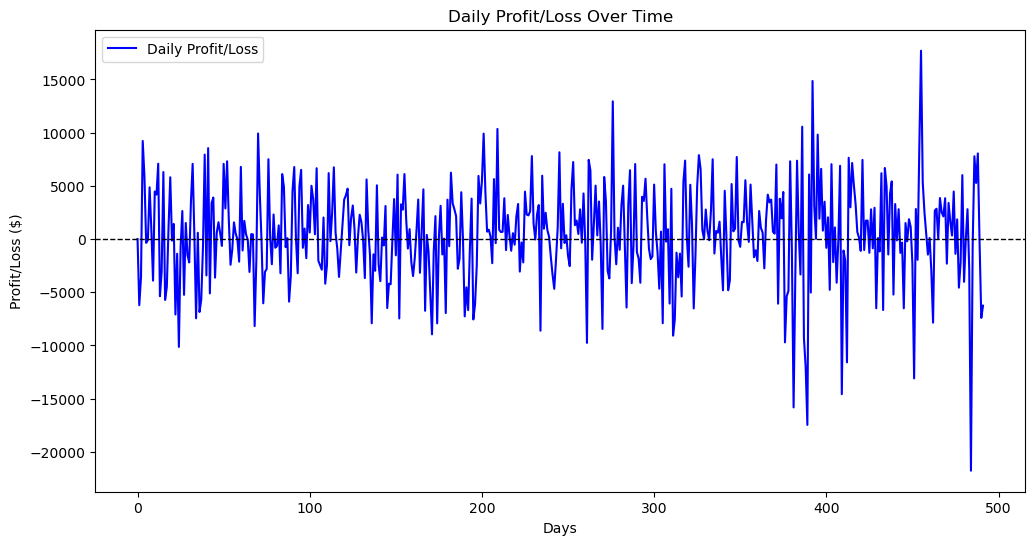

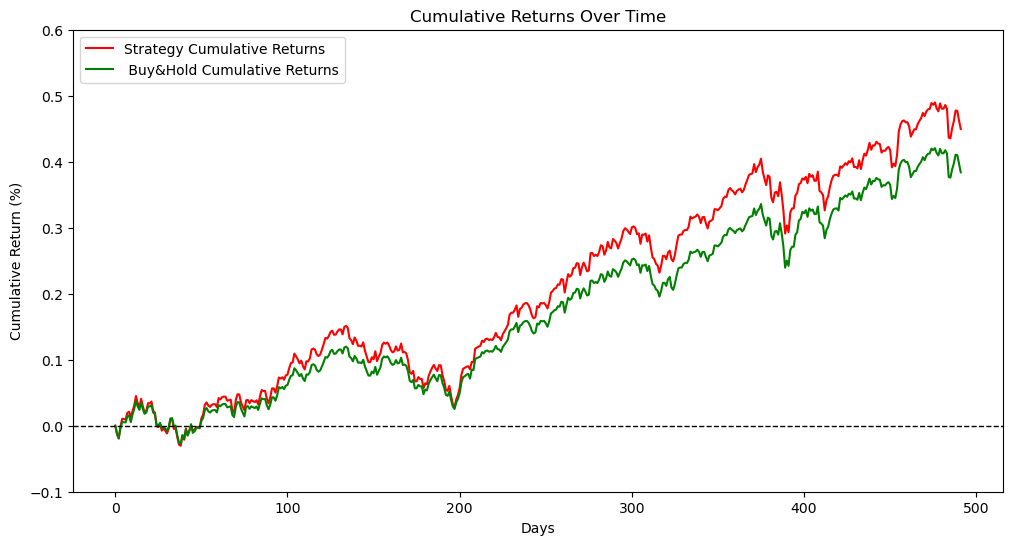

In [19]:
# Initialize tracking variables
portfolio_values = []
profits = []
cumulative_returns = []
allocations = []

# Initialize portfolio
initial_shares = 100
initial_cash = 100000  # Start with no cash
portfolio_value = initial_shares * test_Data['Close Prices'].iloc[0] + initial_cash # Initial portfolio value
trading_capital = 0.2 * portfolio_value  # 20% of portfolio value for trading
shares_held = initial_shares
cash = initial_cash

cumulative_returns.append(0)
portfolio_values.append(portfolio_value)
profits.append(0)

buy_and_hold_value = initial_shares * test_Data['Close Prices'].iloc[0] + initial_cash
buy_and_hold_cumulative_returns = []
buy_and_hold_cumulative_returns.append(0)
buy_and_hold_profits = []
buy_and_hold_profits.append(0)
buy_and_hold_portfolio_values = []
buy_and_hold_portfolio_values.append(buy_and_hold_value)

# Trading simulation
for i in range(1,len(input_test_data)):
    current_price = test_Data['Close Prices'].iloc[i]
    current_input = input_test_data.iloc[i]
    current_input = current_input.to_numpy().reshape(1, -1)
    
    # Forward Pass
    hidden_input = np.dot(current_input, weights1) + hiddenbias
    hidden_output = tanh(hidden_input)
    
    output_input = np.dot(hidden_output, weights2) + outbias
    allocation = tanh(output_input)
    allocations.append(allocation)

    # Recalculate trading capital dynamically
    # trading_capital = 0.2 * portfolio_value

    # Trading logic with risk management
    if allocation > 0:  # Buy signal
        # Calculate the number of shares to buy, ensuring cash does not go negative
        max_shares_to_buy = int(cash / current_price) if cash > 0 else 0
        shares_to_buy = min(int((trading_capital * allocation) / current_price), max_shares_to_buy)
        cost = shares_to_buy * current_price
        
        # Update portfolio
        shares_held += shares_to_buy
        cash -= cost
    elif allocation < 0:  # Sell signal
        # Calculate the number of shares to sell
        shares_to_sell = int((trading_capital * abs(allocation)) / current_price)
        shares_to_sell = min(shares_to_sell, shares_held)  # Cannot sell more than held
        revenue = shares_to_sell * current_price
        
        # Update portfolio
        shares_held -= shares_to_sell
        cash += revenue

    # Update portfolio value
    new_portfolio_value = shares_held * current_price + cash
    daily_profit = new_portfolio_value - portfolio_values[i-1]  # Profit on this day
    portfolio_values.append(new_portfolio_value)
    profits.append(daily_profit)

    new_buy_and_hold_portfolio_value = initial_shares * current_price + initial_cash
    buy_and_hold_daily_profit = new_buy_and_hold_portfolio_value - buy_and_hold_portfolio_values[i-1]
    buy_and_hold_portfolio_values.append(new_buy_and_hold_portfolio_value)
    buy_and_hold_profits.append(buy_and_hold_daily_profit)

    # Calculate cumulative return
    cumulative_returns.append((new_portfolio_value / portfolio_values[0]) - 1)
    buy_and_hold_cumulative_returns.append(((initial_shares * current_price + initial_cash) / buy_and_hold_value) - 1)
    
    # Update portfolio value
    portfolio_value = new_portfolio_value

# Final portfolio value
print(f"Final Portfolio Value: {portfolio_value}")
print(f"Shares Held: {shares_held}")
print(f"Cash: {cash}")

# Plot daily profits
plt.figure(figsize=(12, 6))
plt.plot(profits, label="Daily Profit/Loss", color="blue")
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Zero-profit line
plt.xlabel("Days")
plt.ylabel("Profit/Loss ($)")
plt.title("Daily Profit/Loss Over Time")
plt.legend()
plt.show()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
plt.plot(cumulative_returns, label="Strategy Cumulative Returns", color="red")
plt.plot(buy_and_hold_cumulative_returns, label=" Buy&Hold Cumulative Returns", color="green")
plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Zero return line
plt.ylim(-0.1,0.6)
plt.xlabel("Days")
plt.ylabel("Cumulative Return (%)")
plt.title("Cumulative Returns Over Time")
plt.legend(loc='upper left')
plt.show()

# Plot buy and hold
# plt.figure(figsize=(12, 6))
# plt.plot(buy_and_hold_cumulative_returns, label="Cumulative Returns", color="green")
# plt.axhline(0, color='black', linestyle='--', linewidth=1)  # Zero return line
# plt.xlabel("Days")
# plt.ylabel("Cumulative Return (%)")
# plt.title("Buy and Hold Cumulative Returns Over Time")
# plt.legend()
# plt.show()

In [20]:
# Calculation for Asset Returns and Mu
asset_returns = allocations * test_Data['PCT today'].values
average_daily_return = np.mean(asset_returns)
average_daily_excess_return = average_daily_return - k
    
# Calculation of Standard deviation
squared_deviations = np.square(asset_returns - average_daily_excess_return)
sigma = np.sqrt(np.mean(squared_deviations))
    
# Annulaized Sharpe Ratio
annualized_SR = np.sqrt(T) * (average_daily_excess_return / sigma)
print(f"Annualized Sharpe Ratio: {annualized_SR}")

Annualized Sharpe Ratio: 1.455125622578843


In [21]:
# Calculate daily returns
daily_returns = np.diff(portfolio_values) / portfolio_values[:-1]

# Calculate average daily return
average_daily_return = np.mean(daily_returns)

# Calculate standard deviation of daily returns
std_dev_daily_returns = np.std(daily_returns)

# Annualize the average daily return and standard deviation
annualized_return = average_daily_return * 253
annualized_std_dev = std_dev_daily_returns * np.sqrt(253)

# Risk-free rate
risk_free_rate = 0.0002

# Calculate Sharpe Ratio
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_std_dev

print(f"Sharpe Ratio: {sharpe_ratio}")

Sharpe Ratio: 1.6387849011571733


In [22]:
sum(profits)

224408.47534179688

In [23]:
sum(allocations)

array([[225.68714228]])

In [24]:
sum(buy_and_hold_profits)

191596.9970703125

In [25]:
allocations

[array([[0.80887577]]),
 array([[0.87449675]]),
 array([[0.97419953]]),
 array([[0.98054502]]),
 array([[0.93636033]]),
 array([[-0.63986634]]),
 array([[-0.77445882]]),
 array([[-0.70153065]]),
 array([[0.10573981]]),
 array([[0.89899527]]),
 array([[0.78746542]]),
 array([[0.84963034]]),
 array([[-0.20098444]]),
 array([[-0.0497257]]),
 array([[0.40801633]]),
 array([[0.56703537]]),
 array([[0.97696191]]),
 array([[0.96898701]]),
 array([[0.87609487]]),
 array([[0.84321271]]),
 array([[0.0725625]]),
 array([[-0.09515267]]),
 array([[0.13477752]]),
 array([[0.4153485]]),
 array([[0.97759206]]),
 array([[0.97759464]]),
 array([[0.9588825]]),
 array([[0.90706345]]),
 array([[-0.28339975]]),
 array([[-0.0689789]]),
 array([[-0.2418434]]),
 array([[0.10315063]]),
 array([[0.33087313]]),
 array([[-0.60128854]]),
 array([[-0.4989144]]),
 array([[0.28218772]]),
 array([[0.963027]]),
 array([[0.98356072]]),
 array([[0.97675526]]),
 array([[0.92403413]]),
 array([[-0.35581679]]),
 array([[-0.8